In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


In [2]:
data_path = '/kaggle/input/ravdess1/'

In [3]:
train_features_df = pd.read_csv(data_path + 'train_dataset_augmented.csv')
test_features_df = pd.read_csv(data_path + 'test_dataset_augmented.csv')

In [4]:
X_train = train_features_df.iloc[:, :-1]
y_train = train_features_df.iloc[:, -1:]

X_test = test_features_df.iloc[:, :-1]
y_test = test_features_df.iloc[:, -1:]

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
clf = RandomForestClassifier(max_depth=150, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.6070175438596491

In [7]:
y_pred = clf.predict(X_test)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
confusion_matrix(y_test, y_pred)

array([[31,  0,  7,  0,  1,  0,  0,  3],
       [ 0, 36,  1,  0,  0,  0,  3,  0],
       [ 5,  2, 23,  1,  8,  0,  1,  1],
       [ 3,  4,  3, 13,  3,  1,  4,  4],
       [ 3,  1,  3,  2, 19,  0,  2,  2],
       [ 0,  5,  1,  0,  1,  5,  1,  2],
       [ 0, 11,  1,  1,  2,  1, 22,  2],
       [ 2,  2,  3,  1,  5,  2,  1, 24]])

In [10]:
y_test.value_counts()

labels  
angry       42
disgust     41
calm        40
sad         40
surprise    40
fear        35
happy       32
neutral     15
dtype: int64

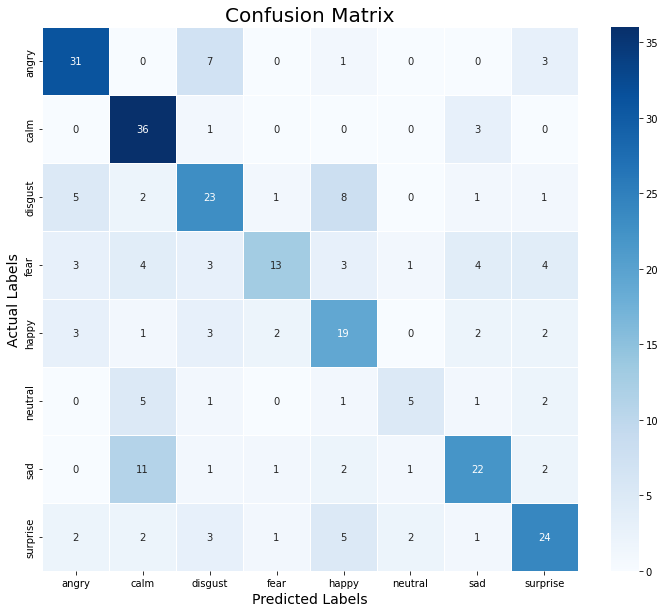

In [11]:
cm = confusion_matrix(y_test, y_pred, labels=['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'])
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = ['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'] , columns = ['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.70      0.74      0.72        42
        calm       0.59      0.90      0.71        40
     disgust       0.55      0.56      0.55        41
        fear       0.72      0.37      0.49        35
       happy       0.49      0.59      0.54        32
     neutral       0.56      0.33      0.42        15
         sad       0.65      0.55      0.59        40
    surprise       0.63      0.60      0.62        40

    accuracy                           0.61       285
   macro avg       0.61      0.58      0.58       285
weighted avg       0.62      0.61      0.60       285

